In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import (
    Binarizer,
    StandardScaler,
    LabelBinarizer,
    OneHotEncoder,
)
from sklearn.linear_model import LogisticRegression
from sklearnex import patch_sklearn

patch_sklearn()
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.neural_network import MLPClassifier

# import dtale
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# sns.set()
pd.options.display.max_columns = 50
pd.options.plotting.backend = "plotly"
from sklearn import set_config

set_config(display="diagram")
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    MinMaxScaler,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import warnings
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
import plotly.express as px

warnings.filterwarnings("ignore")
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier,
    GradientBoostingClassifier,
)
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    # StratifiedGroupKFold,
    StratifiedKFold,
)
import sigopt

from sklearn.naive_bayes import (
    BernoulliNB,
    CategoricalNB,
    MultinomialNB,
    ComplementNB,
    GaussianNB,
)
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import QuantileTransformer

nb_est = [CategoricalNB(), MultinomialNB(), ComplementNB(), GaussianNB()]
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.tree import export_graphviz, plot_tree

# import seaborn as sns
# import matplotlib.pyplot as plt
from tqdm import tqdm

# from xgboost import XGBClassifier
from joblib import parallel_backend

# from autosklearn.automl import AutoMLClassifier
import sklearn.metrics

dtype_info = {
    "v_1": "Binary",
    "v_26": "Binary",
    "v_11": "Binary",
    "v_14": "Binary",
    "v_30": "Binary",
    "v_28": "Binary",
    "v_9": "Binary",
    "v_27": "Binary",
    "v_32": "Nominal",
    "v_4": "Nominal",
    "v_3": "Nominal",
    "v_20": "Nominal",
    "v_21": "Nominal",
    "v_18": "Nominal",
    "v_25": "Nominal",
    "v_12": "Nominal",
    "v_31": "Ordinal",
    "v_15": "Ordinal",
    "v_19": "Ordinal",
    "v_13": "Ordinal",
    "v_33": "Ordinal",
    "v_17": "Ordinal",
    "v_29": "Ordinal",
    "v_23": "Ordinal",
    "v_6": "Ordinal",
    "v_24": "Ordinal",
    "v_10": "Ordinal",
    "v_5": "Ordinal",
    "v_22": "Ordinal",
    "v_0": "Ordinal",
    "v_16": "Ratio",
    "v_2": "Ratio",
    "v_8": "Ratio",
    "v_7": "Ratio",
    "v_39": "Ratio",
    "v_37": "Ratio",
    "v_38": "Ratio",
    "v_34": "Ratio",
    "v_40": "Ratio",
    "v_36": "Ratio",
    "v_35": "Ratio",
}
data = pd.read_csv(
    "../data/train.csv",
    index_col=0,
)
ordinal = [i for i in dtype_info if dtype_info[i] == "Ordinal"]
nominal = [i for i in dtype_info if dtype_info[i] == "Nominal"]
binary = [i for i in dtype_info if dtype_info[i] == "Binary"]
ratio = [i for i in dtype_info if dtype_info[i] == "Ratio"]


def categorise_data(data):
    ordinal_data = data.loc[:, ordinal]
    nominal_data = data.loc[:, nominal]
    binary_data = data.loc[:, binary]
    ratio_data = data.loc[:, ratio]
    return ordinal_data, nominal_data, binary_data, ratio_data


ordinal_data, nominal_data, binary_data, ratio_data = categorise_data(data)


def gen_train_test(data, p):
    Y = data.label
    X_2 = Y_2 = Y[Y == 2].index
    X_0 = Y_0 = Y[Y == 0].index
    X_1 = Y_1 = Y[Y == 1].index
    train_size = int(p * Y_2.shape[0])
    test_size = int((1 - p) * Y_2.shape[0])

    train_idx_2 = np.random.choice(Y_2, (train_size,))
    train_idx_1 = np.random.choice(Y_1, (train_size,))
    train_idx_0 = np.random.choice(Y_0, (train_size,))
    train_idx = np.r_[train_idx_0, train_idx_1, train_idx_2]
    # train_idx.shape

    test_idx_2 = np.random.choice(np.setdiff1d(Y_2, train_idx_2), (test_size,))
    test_idx_1 = np.random.choice(np.setdiff1d(Y_1, train_idx_1), (test_size,))
    test_idx_0 = np.random.choice(np.setdiff1d(Y_0, train_idx_0), (test_size,))
    test_idx = np.r_[test_idx_0, test_idx_1, test_idx_2]
    # test_idx.shape
    return train_idx, test_idx

prediction_data = pd.read_pickle('../data/pred_data.pkl')
data__ = pd.read_parquet("../data/data_with_ridit.hdfs", engine="fastparquet")
import os

os.environ["SIGOPT_PROJECT"] = "notebooks"

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
%reload_ext sigopt
%sigopt config

SigOpt API token (find at https://app.sigopt.com/tokens/info):

  ················································


Log Collection
	This will capture and upload the standard output and standard error of your
	Runs from the CLI and notebook cells so that you can view them on the SigOpt dashboard.
Enable log collection [y/N]:

  y


Notebook Cell Tracking
	This will record and upload the content of your notebook cells so that you can view them
	on the SigOpt dashboard.
Enable cell tracking [y/N]:

  y


In [ ]:
dtc__params = {
    "ccp_alpha": 0.0,
    "class_weight": None,
    "criterion": "gini",
    "max_depth": None,
    "max_features": None,
    "max_leaf_nodes": None,
    "min_impurity_decrease": 0.0,
    "min_impurity_split": None,
    "min_samples_leaf": 1,
    "min_samples_split": 2,
    "min_weight_fraction_leaf": 0.0,
    "random_state": None,
    "splitter": "best",
}

# dtc.get_params()
def evaluate_best_dtc(n_cv):
    global data
    dtc__params = {
        "ccp_alpha": 0.0,
        "class_weight": None,
        "criterion": "gini",
        "max_depth": None,
        "max_features": None,
        "max_leaf_nodes": None,
        "min_impurity_decrease": 0.0,
        "min_impurity_split": None,
        "min_samples_leaf": np.random.randint(1, 5),
        "min_samples_split": 2,
        "min_weight_fraction_leaf": 0.0,
        "random_state": 42,
        "splitter": "best",
    }
    sigopt.log_dataset("Ordinal_Data")
    sigopt.log_model(DecisionTreeClassifier().__class__.__name__)
    sigopt.log_metadata(key="Features", value=ordinal)

    train_idx, test_idx = gen_train_test(data, 1.0)
    # X_train, y_train = ordinal_data.loc[train_idx, :], pd.get_dummies(data['label'].loc[train_idx])
    X_train, y_train = ordinal_data.loc[train_idx, :], data["label"].loc[train_idx]
    for k, v in dtc__params.items():
        sigopt.params.setdefault(k, v)
    # clf = OneVsRestClassifier(model, n_jobs=-1)
    with parallel_backend("threading", n_jobs=-1):
        model = DecisionTreeClassifier(
            max_features=14,
            min_samples_leaf=dtc__params["min_samples_leaf"],
            min_impurity_decrease=sigopt.params.min_impurity_decrease,
            random_state=42,
            ccp_alpha=sigopt.params.ccp_alpha,
        )
        cv_results = cross_validate(
            model,
            X_train,
            y_train,
            scoring="f1_macro",
            return_train_score=True,
            n_jobs=-1,
            cv=n_cv,
            return_estimator=True,
        )
        sigopt.params.min_samples_leaf = model.min_samples_leaf
    # sigopt.params.ccp_alpha=0
    # print(sigopt.params)
    sigopt.log_metric(name="f1_macro", value=cv_results["test_score"].mean())
    return cv_results

In [ ]:
%%experiment
{
    'name': 'DTC Optimization',
    'metrics': [
        {
            'name': 'f1_macro',
            'strategy': 'optimize',
            'objective': 'maximize',
        }
    ],
    'parameters': [
        {
            'name': 'min_impurity_decrease',
            'type': 'double',
            'bounds': {'min': 0.0, 'max': 1.0}
        }

    ],
    'type':'offline',
    'budget': 10
}



In [ ]:
%%optimize 
evaluate_best_dtc(5)

In [ ]:
# X_train, y_train = nom_dum.loc[train_idx,:], data['label'].loc[train_idx]
# X_train, y_train = nominal_data.loc[train_idx,:], data['label'].loc[train_idx]
# X_train, y_train = nom_dum.iloc[train_idx,imp_nom], data['label'].loc[train_idx]
# cv_results = cross_validate(dtc, X_train, y_train, scoring='f1_macro', return_train_score=True, n_jobs=-1, cv=10, return_estimator=True, )
# cv_results
train_idx, test_idx = gen_train_test(data, 0.75)
X_train, y_train = (
    nominal_data.loc[train_idx, :].astype("category"),
    data["label"].loc[train_idx],
)
X_test, y_test = (
    nominal_data.loc[test_idx, :].astype("category"),
    data["label"].loc[test_idx],
)

In [ ]:
def qt_trial():
    qt = QuantileTransformer(
        n_quantiles=200, output_distribution="normal", random_state=42
    )
    train_idx, test_idx = gen_train_test(data, 1.0)
    X_train, y_train = (
        ordinal_data.loc[
            train_idx, ["v_10", "v_17", "v_5", "v_29", "v_19", "v_22", "v_6"]
        ],
        data["label"].loc[train_idx],
    )
    for c in X_train:
        med = X_train[c].median()
        X_train[c] = (X_train[c]) / med
    with parallel_backend("threading", n_jobs=-1):
        model = DecisionTreeClassifier(
            criterion="entropy",
            # max_features='sqrt',
            # learning_rate=0.
            # n_jobs=-1,
            # min_samples_leaf=1,
            random_state=42,
        )
        model_wf = make_pipeline(qt, model)
        cv_results = cross_validate(
            model_wf,
            X_train,
            y_train,
            scoring="f1_macro",
            return_train_score=True,
            n_jobs=-1,
            cv=3,
            return_estimator=True,
        )
    cv_results["test_score"].mean(), cv_results["train_score"].mean()

In [11]:
category_data = data.loc[:,nominal+ordinal].astype('category')
pre_category_data = prediction_data.loc[:,nominal+ordinal].astype('category')

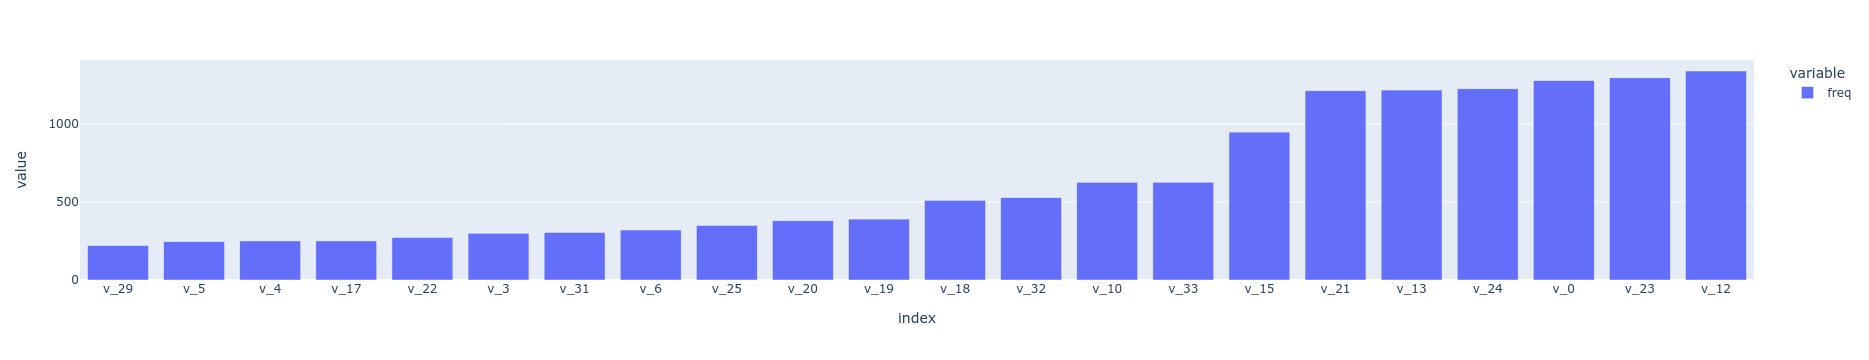

In [23]:
N = pre_category_data.shape[0]
# fig = plt.axhline(y = 0.5*N, color = 'r', linestyle = '--', label = "50%")
# fig = plt.axhline(y = 0.80*N, color = 'g', linestyle = '--', label = "80%")
# fig = plt.axhline(y = 0.25*N, color = 'y', linestyle = '--', label = "25%")
# fig = plt.axhline(y = 0.15*N, color = 'black', linestyle = '--', label = "15%")

# fig = plt.legend()
pfig = pre_category_data.describe().loc['freq',:].sort_values().plot(kind='bar')
pfig

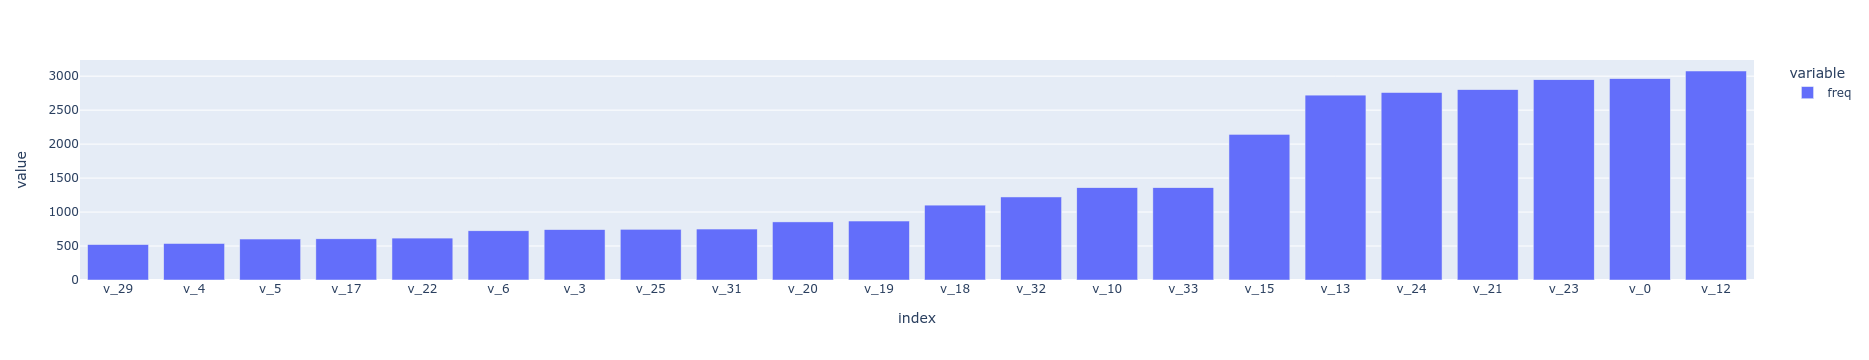

In [24]:
N = category_data.shape[0]
fig= category_data.describe().loc['freq',:].sort_values().plot(kind='bar')
# fig = plt.axhline(y = 0.60*N, color = 'r', linestyle = '--', label = "50%")
# fig = plt.axhline(y = 0.75*N, color = 'g', linestyle = '--', label = "75%")
# fig = plt.axhline(y = 0.25*N, color = 'y', linestyle = '--', label = "25%")
# fig = plt.axhline(y = 0.15*N, color = 'black', linestyle = '--', label = "15%")
# fig = plt.legend()
fig

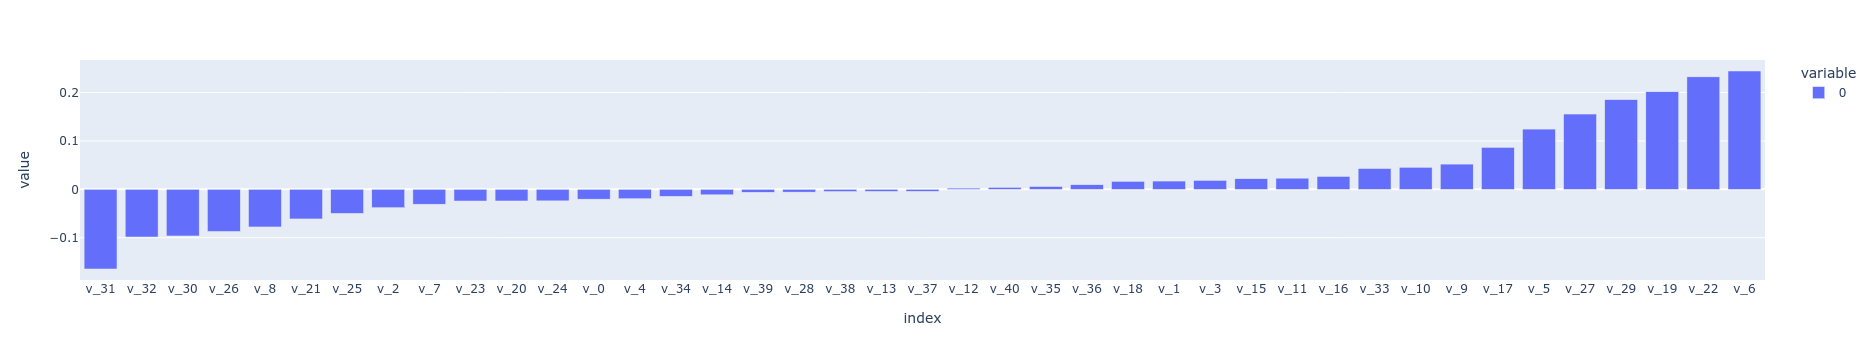

In [25]:
import seaborn as sns
sns.set()
# fig = data.corrwith(data.label, method='kendall').sort_values().iloc[:-1].plot(kind='bar', figsize=(20,5))
fig = data.corrwith(data.label, method='kendall').sort_values().iloc[:-1].plot(kind='bar')
fig

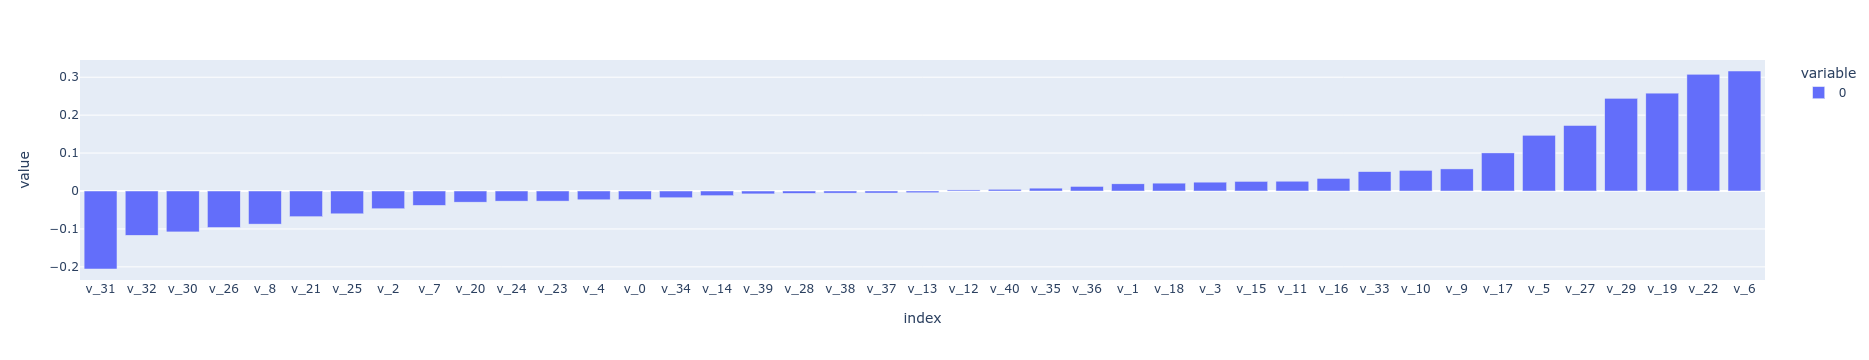

In [26]:
# fig = data.corrwith(data.label, method='spearman').sort_values().iloc[:-1].plot(kind='bar', figsize=(20,5))
fig = data.corrwith(data.label, method='spearman').sort_values().iloc[:-1].plot(kind='bar')
fig

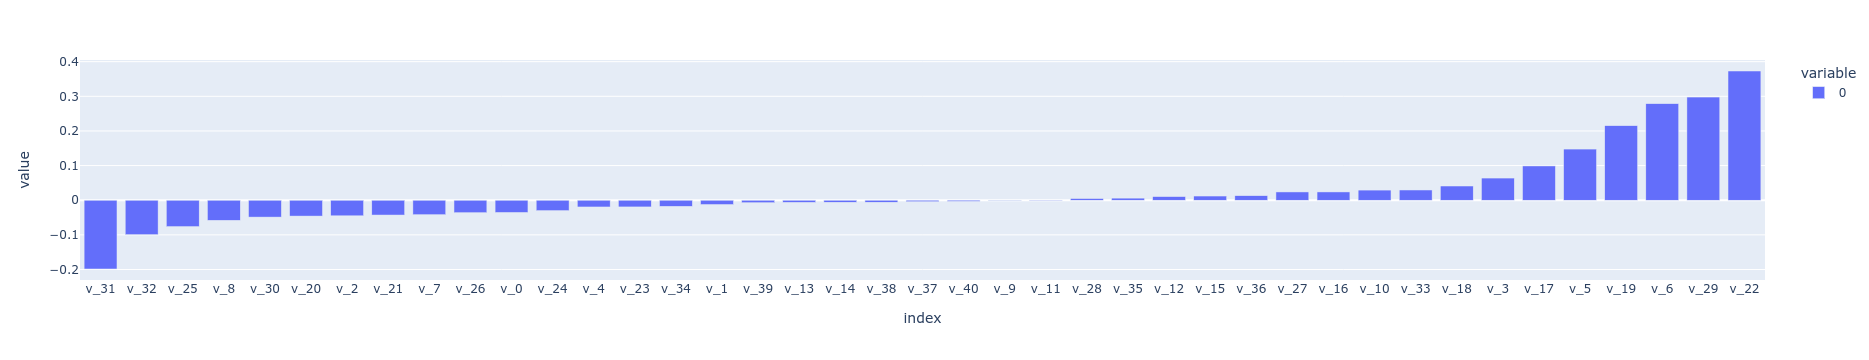

In [27]:
# fig = data.corrwith(data.label, method='pearson').sort_values().iloc[:-1].plot(kind='bar', figsize=(20,5))
fig = data.corrwith(data.label, method='pearson').sort_values().iloc[:-1].plot(kind='bar')
fig

In [54]:
nominal

['v_32', 'v_4', 'v_3', 'v_20', 'v_21', 'v_18', 'v_25', 'v_12']

In [9]:

df = pre_category_data
# fig = px.parallel_categories(df,color_continuous_scale=px.colors.sequential.Inferno,)
# fig.
# fig.show()

In [67]:
# categorise_data